___
# Atividade: Variáveis qualitativas com a PNAD (ALUNOS)
Vinicius Bonelli Falco
___

## Aula 02


**Link úteis:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 16 – destacando para variáveis qualitativas.
2.	10 Minutes to Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
3.	Essential Basic Functionality: http://pandas.pydata.org/pandas-docs/stable/basics.html
4.  Estude a aula `Aula02 Análise Exploratoria Variáveis Qualitativas-ALUNOS.ipynb`, o qual contém uma introdução ao Jupyter Notebook. A publicação dessa aula tem como objetivo auxiliá-lo, caso queira, no desenvolvimento dos seus próximos programas, como esta atividade.

**Hoje:**
1.	Analisar variáveis qualitativas de forma uni e bivariadas utilizando tabelas de frequências e gráficos de barras e de pizza (ou setor).
2.  Trabalhar com a base de dados da PNAD 2013 - Pesquisa Nacional por Amostra de Domicílios

**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 17 – destacando para variáveis quantitativas; pág. 106 e 107 (Definição 4.1 e Exemplo 4.1).

___


___
## <font color='blue'>PNAD 2013 – PESQUISA NACIONAL POR AMOSTRA DE DOMICÍLIOS</font>

**Base de dados reduzida: ** `pes2013A.txt` (75 MB)
[Acesse a base de dados aqui: https://dl.dropboxusercontent.com/u/65763596/Aula02/pes2013A.txt] 

**Dicionário das variáveis: ** `Dicionário de variáveis de pessoas - PNAD 2013.xlsx`
[Acesse dicionário aqui: https://dl.dropboxusercontent.com/u/65763596/Aula02/Dicion%C3%A1rio%20de%20vari%C3%A1veis%20de%20pessoas%20-%20PNAD%202013.xls]


Muitos especialistas na área de negócios dizem que empresários mais bem sucedidos são aqueles que fazem um planejamento antes de começar seu próprio negócio. Nessa visão, imagine que o Sr. Gold tenha como grande objetivo abrir uma nova faculdade e para isso deseja estudar o perfil do estudante que cursa ensino médio ou pré-vestibular e do que cursa ensino superior. 

Assuma que as variáveis de interesse a respeito dos estudantes sejam relativamente as mesmas de 2013 até o momento atual. Nesse caso, seja criativo para ajudar o Sr. Gold que deseja abrir seu negócio, mas não tem certeza sobre quais variáveis o interessam. 

Vocês podem ajudá-lo?!  

As variáveis a seguir devem fazer parte da sua análise:

* V0302: sexo
* V0404: cor ou raça
* V6002: rede de ensino
* V4802: nível de ensino e grupos de séries do ensino fundamental que frequentavam (todos os estudantes)

** Crie uma variável com região do indivíduo amostrado considerando a variável `UF` que define o estado e também trabalhe com essa nova variável em suas análises. ** 

** Escolha mais pelo menos DUAS variáveis qualitativas para completar sua análise!! **

Faça uma análise exploratória apenas com as variáveis qualitativas com foco no objetivo do Sr. Gold.

Sua análise deve conter pelo menos uma das seguintes visualizações:

1. Gráfico de colunas (bar) e setor (pie) com as frequências relativas cadas categorias das variáveis qualitativas.
2. Tabela cruzada entre pares de variaveis qualitativas. Montar o gráfico de colunas. Repetir o processo habilitando a opção "stacked=True".


___


<font color='red'>
Crie um repositório chamado CD em seu Github
</font>


Neste repositório, salve seu trabalho numa pasta chamada aula2

Por exemplo, se seu login for *pikachu* o projeto vai estar na pasta:

https://github.com/<font color=red>pikachu/CD/aula2</font>



## <font color='red'>Terça-feira (dia 16/08), no horário de atendimento da sua turma, deverá apresentar aos NINJAS!!</font>
___

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Vinicius Bonelli\Documents\GitHub\CD\aula2


In [4]:
dados = pd.read_csv('pes2013A.txt', sep = " ")
dados.head()
dados.iloc[:,5]
pd.DataFrame(dados.iloc[:,[1,5,7,8,12,22,23,58]])
dados.shape
n=dados.shape[0]
list(dados)

['V0101',
 'UF',
 'V0102',
 'V0103',
 'V0301',
 'V0302',
 'V8005',
 'V0404',
 'V4011',
 'V0412',
 'V0501',
 'V0502',
 'V5030',
 'V0504',
 'V0505',
 'V5061',
 'V5062',
 'V5063',
 'V5064',
 'V5065',
 'V0601',
 'V0602',
 'V6002',
 'V6020',
 'V6003',
 'V0606',
 'V6007',
 'V0611',
 'V06111',
 'V061111',
 'V061112',
 'V061113',
 'V061114',
 'V06112',
 'V9001',
 'V9906',
 'V9907',
 'V9029',
 'V9030',
 'V9031',
 'V9032',
 'V9042',
 'V9043',
 'V9044',
 'V9045',
 'V9046',
 'V9047',
 'V9048',
 'V1091',
 'V1092',
 'V1101',
 'V1141',
 'V1142',
 'V1151',
 'V1152',
 'V1153',
 'V1154',
 'V4801',
 'V4802',
 'V4803',
 'V4704',
 'V4805',
 'V4706',
 'V4707',
 'V4809',
 'V4810',
 'V4711',
 'V4718',
 'V4720',
 'V4742',
 'V4750',
 'V4729']

Frequências relativas por sexo:
Mulher    51.4
Homem     48.6
dtype: float64 



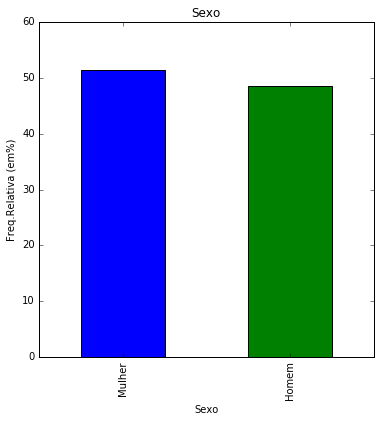

In [5]:
dados.V0302 = dados.V0302.astype('category')
dados.V0302.cat.categories = ('Homem', 'Mulher')
print('Frequências relativas por sexo:')
fr1 = (dados.V0302.value_counts()/n*100).round(decimals=1)
print(fr1,'\n')
plot1 = fr1.plot(kind='bar',title='Sexo',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Sexo')

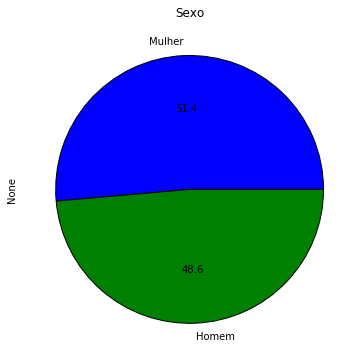

In [6]:
plot2 = fr1.plot(kind='pie',title='Sexo',autopct='%.1f',figsize=(6, 6))

Frequências relativas por raça:
Indígena          48.0
Preta             42.8
Amarela            8.3
Branca             0.5
Parda              0.4
Sem Declaração     0.0
dtype: float64 



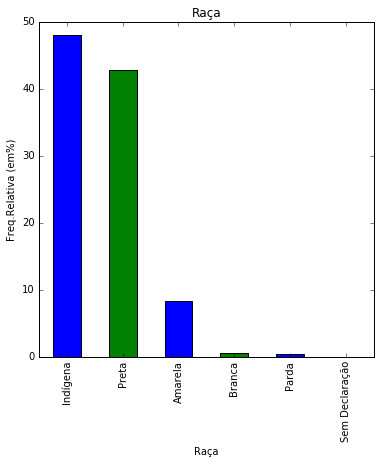

In [7]:
dados.V0404 = dados.V0404.astype('category')
dados.V0404.cat.categories = ('Branca', 'Preta', 'Amarela', 'Parda', 'Indígena', 'Sem Declaração')
print('Frequências relativas por raça:')
fr2 = (dados.V0404.value_counts()/n*100).round(decimals=1)
print(fr2,'\n')
plot3 = fr2.plot(kind='bar',title='Raça',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Raça')


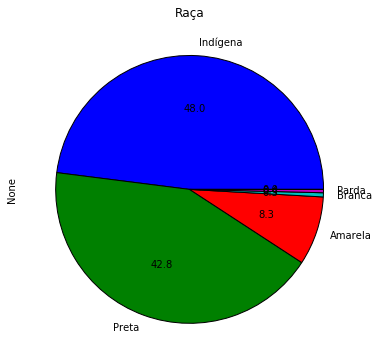

In [8]:
plot4 = fr2.plot(kind='pie',title='Raça',autopct='%.1f',figsize=(6, 6))

Frequências relativas por ensino:
Privada    21.5
Pública     6.9
dtype: float64 



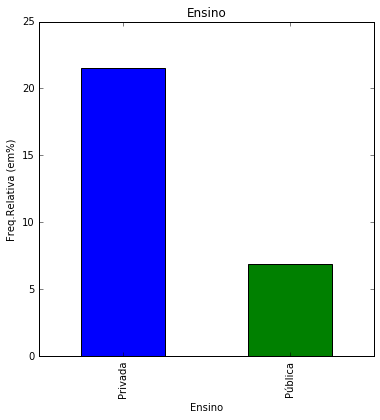

In [9]:
dados.V6002 = dados.V6002.astype('category')
dados.V6002.cat.categories = ('Privada', 'Pública')
print('Frequências relativas por ensino:')
fr3 = (dados.V6002.value_counts()/n*100).round(decimals=1)
print(fr3,'\n')
plot5 = fr3.plot(kind='bar',title='Ensino',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Ensino')


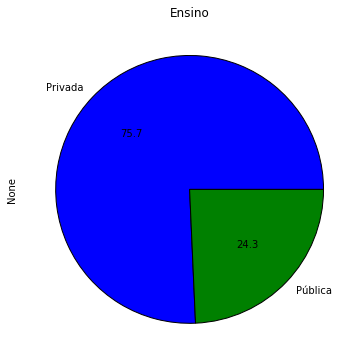

In [10]:
plot6 = fr3.plot(kind='pie',title='Ensino',autopct='%.1f',figsize=(6, 6))

Frequências relativas por nível de ensino:
2ª a 5ª séries do ensino fundamental regular em 9 anos            7.0
6ª a 9ª séries do ensino fundamental regular em 9 anos            6.3
Ensino médio                                                      4.8
Superior                                                          3.8
Maternal                                                          1.7
1ª série do ensino fundamental regular em 9 anos                  1.6
5ª a 8ª séries do ensino fundamental regular                      0.6
1ª a 4ª séries do ensino fundamental regular                      0.3
Classe de alfabetização                                           0.3
Educação de jovens e adultos não seriado do ensino fundamental    0.1
Alfabetização de adultos                                          0.1
dtype: float64 



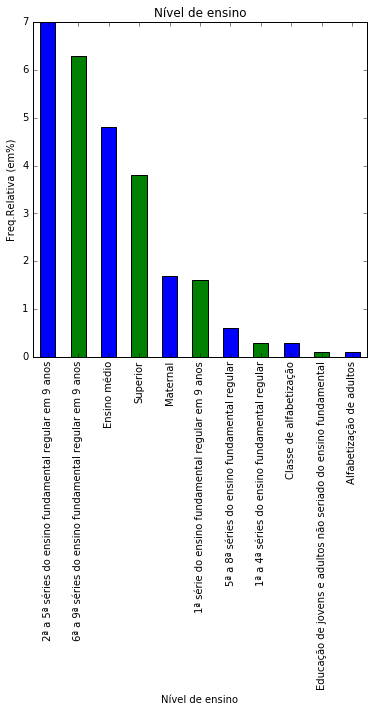

In [11]:
dados.V4802 = dados.V4802.astype('category')
dados.V4802.cat.categories = ('Maternal', 'Classe de alfabetização', 'Alfabetização de adultos', '1ª a 4ª séries do ensino fundamental regular', '5ª a 8ª séries do ensino fundamental regular', '1ª série do ensino fundamental regular em 9 anos', '2ª a 5ª séries do ensino fundamental regular em 9 anos', '6ª a 9ª séries do ensino fundamental regular em 9 anos', 'Educação de jovens e adultos não seriado do ensino fundamental', 'Ensino médio', 'Superior')
print('Frequências relativas por nível de ensino:')
fr4 = (dados.V4802.value_counts()/n*100).round(decimals=1)
print(fr4,'\n')
plot7 = fr4.plot(kind='bar',title='Nível de ensino',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Nível de ensino')





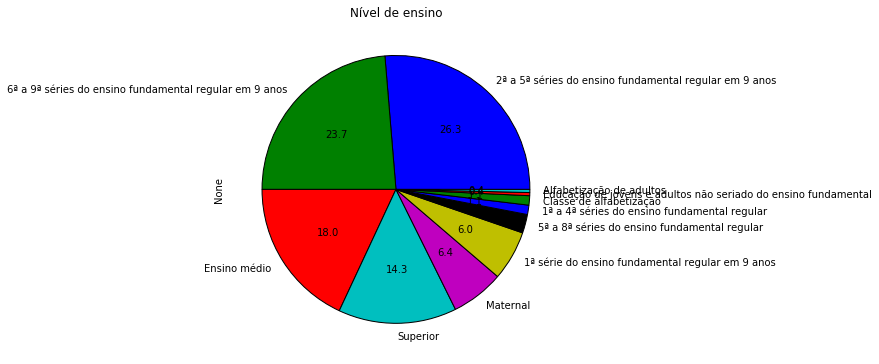

In [12]:
plot8 = fr4.plot(kind='pie',title='Nível de ensino',autopct='%.1f',figsize=(6, 6))

Frequências relativas por Estado civil:
Casado(a)                                     47.7
Solteiro(a)                                    4.6
Viúvo(a)                                       3.3
Desquitado(a) ou separado(a) judicialmente     3.1
Divorciado(a)                                  1.2
dtype: float64 



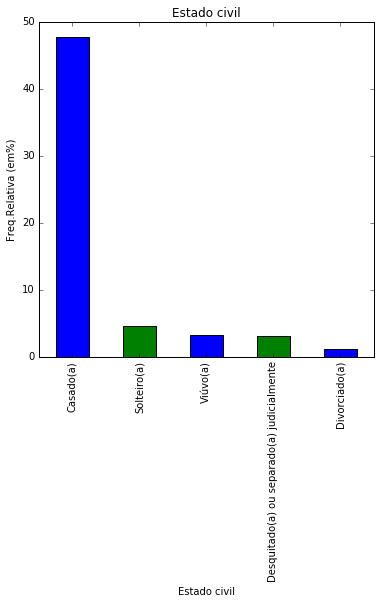

In [13]:
dados.V4011 = dados.V4011.astype('category')
dados.V4011.cat.categories = ('Casado(a)', 'Desquitado(a) ou separado(a) judicialmente', 'Divorciado(a)', 'Viúvo(a)', 'Solteiro(a)')
print('Frequências relativas por Estado civil:')
fr5 = (dados.V4011.value_counts()/n*100).round(decimals=1)
print(fr5,'\n')
plot9 = fr5.plot(kind='bar',title='Estado civil',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Estado civil')

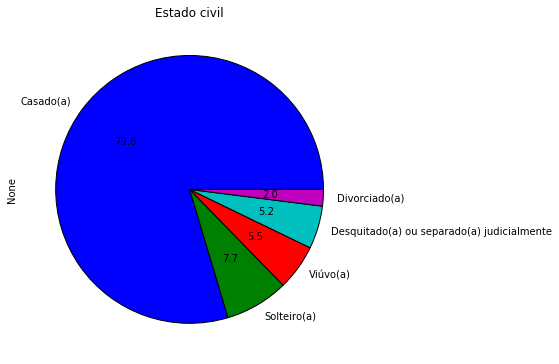

In [14]:
plot10 = fr5.plot(kind='pie',title='Estado civil',autopct='%.1f',figsize=(6, 6))

Frequências relativas por área da rede de ensino:
Municipal    11.6
Estadual      9.1
Federal       0.8
dtype: float64 



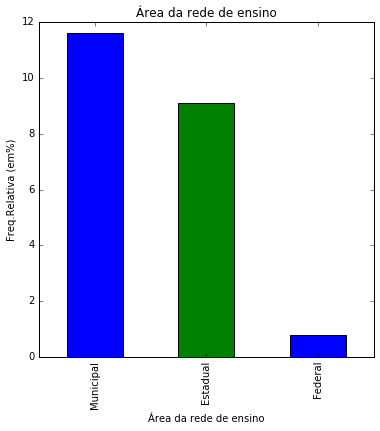

In [15]:
dados.V6020 = dados.V6020.astype('category')
dados.V6020.cat.categories = ('Municipal', 'Estadual', 'Federal')
print('Frequências relativas por área da rede de ensino:')
fr6 = (dados.V6020.value_counts()/n*100).round(decimals=1)
print(fr6,'\n')
plot11 = fr6.plot(kind='bar',title='Área da rede de ensino',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Área da rede de ensino')

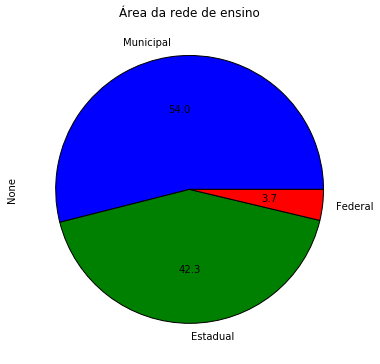

In [16]:
plot12 = fr6.plot(kind='pie',title='Área da rede de ensino',autopct='%.1f',figsize=(6, 6))

C:\Users\Vinicius Bonelli\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Vinicius Bonelli\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Vinicius Bonelli\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Vinicius Bonelli\Anaconda3\lib\site-package

Sudeste         29.0
Nordeste        28.8
Norte           16.3
Sul             15.5
Centro-Oeste    10.4
dtype: float64 



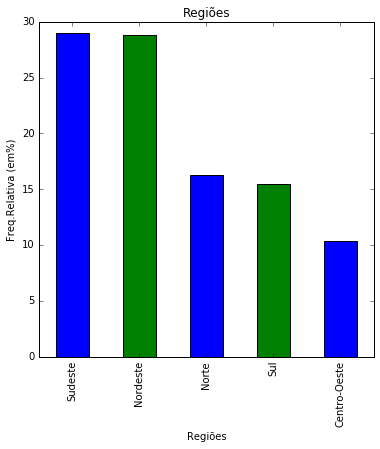

In [17]:
dados["regiao"]=dados.UF 
dados.regiao[(dados.UF >= 40) & (dados.UF < 50)] = 1
dados.regiao[(dados.UF >= 30) & (dados.UF < 40)] = 2 
dados.regiao[(dados.UF >= 50) & (dados.UF < 60)] = 3
dados.regiao[(dados.UF >= 20) & (dados.UF < 30)] = 4
dados.regiao[(dados.UF >= 10) & (dados.UF < 20)] = 5

dados.regiao = dados.regiao.astype('category')
dados.regiao.cat.categories = ('Sul', 'Sudeste', 'Centro-Oeste', 'Nordeste', 'Norte')
fr7 = (dados.regiao.value_counts()/n*100).round(decimals=1)
print(fr7,'\n')
plot13 = fr7.plot(kind='bar',title='Regiões',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Regiões')

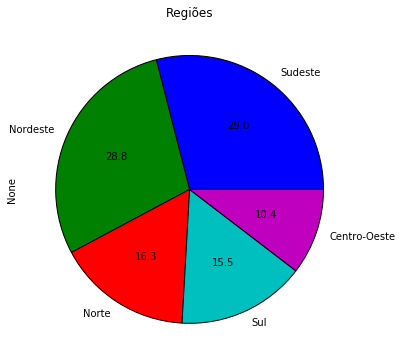

In [18]:
plot14 = fr7.plot(kind='pie',title='Regiões',autopct='%.1f',figsize=(6, 6))

In [20]:
crosstab = pd.crosstab(dados.regiao,dados.V4802)
print(crosstab)

V4802         Maternal  Classe de alfabetização  Alfabetização de adultos  \
regiao                                                                      
Sul                694                       68                        51   
Sudeste           1656                      282                        82   
Centro-Oeste       616                      114                        26   
Nordeste          2182                      371                       227   
Norte             1145                      238                        49   

V4802         1ª a 4ª séries do ensino fundamental regular  \
regiao                                                       
Sul                                                    167   
Sudeste                                                187   
Centro-Oeste                                            72   
Nordeste                                               367   
Norte                                                  299   

V4802         5ª a 8ª sér

In [ ]:
Conclusao:
    Basedo nas analises acima podemos concluir que a regiao com maior potencial para abrir uma faculdade é a regiao 
    nordeste que possui mais alunos no ensino médio, então de imediato tem mais potenciais clientes, e também tem mais
    alunos entre 6 e 9 anos, ou seja, em 4 ou 5 anos a faculdade no nordeste ainda terá maior número de potenciais 
    clientes